# Assignment #1

Run a two-way ANOVA with the advertising dataset. Factor 1 is day of week (Monday through Friday). Factor 2 is section of newspaper (news, business, sports).
1.	What are the hypotheses?
2.	Interpret the main effects and interaction effect.
3.	Draw a plot of the interaction effect.

Run a simple linear regression with the demand dataset. X is price difference and Y is demand. 
1.	What is the R2? Interpret R2.
2.	Interpret the F-statistics.
3.	Interpret the parameter estimates (constant and slope).
4.	What is the regression equation?
5.	What is the predicted value for x=0?



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.graphics.factorplots as graphs

# Problem #1

In [3]:
advertising = pd.read_excel('assignment1/advertising.xls', columns=0)

In [4]:
advertising['Day'] = advertising['Day'].ffill()

In [5]:
news = advertising.loc[:,['Day','News']]
news['Section'] = 'News'
news['Amount'] = news['News']
news = news.drop('News', axis=1)

In [6]:
business = advertising.loc[:,['Day','Business']]
business['Section'] = 'Business'
business['Amount'] = business['Business']
business = business.drop('Business', axis=1)

sports = advertising.loc[:,['Day','Sports']]
sports['Section'] = 'Sports'
sports['Amount'] = sports['Sports']
sports = sports.drop('Sports', axis=1)

In [7]:
data = pd.concat([news, business, sports])
data.reset_index(inplace=True, drop=True)

data.loc[data['Day'] == 'Monday', 'Day'] = 1
data.loc[data['Day'] == 'Tuesday', 'Day'] = 2
data.loc[data['Day'] == 'Wednesday', 'Day'] = 3
data.loc[data['Day'] == 'Thrusday', 'Day'] = 4
data.loc[data['Day'] == 'Friday', 'Day'] = 5

# data.sort_values('Day', ascending=True)

In [8]:
data.loc[data['Section'] == 'News', 'Section'] = 1
data.loc[data['Section'] == 'Sports', 'Section'] = 2
data.loc[data['Section'] == 'Business', 'Section'] = 3

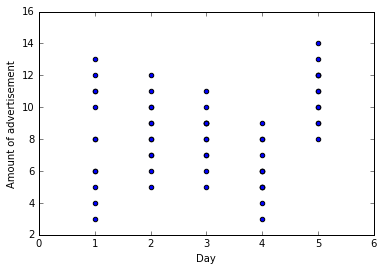

In [9]:
plt.scatter(data['Day'], data['Amount'])
pylab.xlabel('Day')
pylab.ylabel('Amount of advertisement')

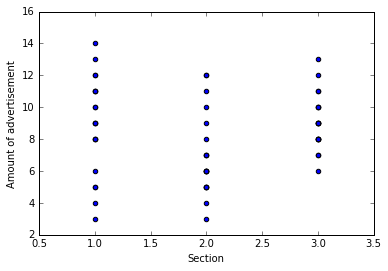

In [10]:
plt.scatter(data['Section'], data['Amount'])
pylab.xlabel('Section')
pylab.ylabel('Amount of advertisement')

- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thrusday
- 5: Friday

```python
data.loc[data['Section'] == 'News', 'Section'] = 0
data.loc[data['Section'] == 'Sports', 'Section'] = 1
data.loc[data['Section'] == 'Business', 'Section'] = 2
```

In [11]:
data.groupby(by='Section')['Amount'].aggregate(['mean','std'])

,mean,std
Section,,
1,8.9,3.059068
2,7.0,2.575185
3,9.1,1.744163


In [12]:
mean_amount_by_day = data.groupby(by='Day')['Amount'].aggregate(['mean','std'])

In [13]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Amount ~ C(Day) + C(Section) + C(Day)*C(Section)'
model = ols(formula, data).fit()

In [14]:
aov_table = statsmodels.stats.anova.anova_lm(model)
aov_table.to_csv('p1_result.csv')

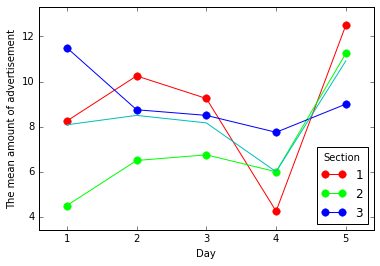

In [34]:
figure = graphs.interaction_plot(data['Day'], data['Section'], data['Amount'], ms=15)
pylab.ylabel('The mean amount of advertisement')
plt.hold()
pylab.plot(mean_amount_by_day['mean'], 'c-')

# Problem #2

In [47]:
demand = pd.read_excel('assignment1/demand.xlsx', columns=0)

In [51]:
X = demand['price difference']
y = demand['demand']

In [62]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     106.3
Date:                Wed, 13 Sep 2017   Prob (F-statistic):           4.88e-11
Time:                        21:33:12   Log-Likelihood:                -7.0261
No. Observations:                  30   AIC:                             18.05
Df Residuals:                      28   BIC:                             20.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                7.8141      0.080     97.818      0.000         7.650     7.978
price difference     2.6652      0.258     10.310      0.000         2.136     3.195
==============================================================================
Omnibus:                        5.481   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.092
Skew:                           0.883   Prob(JB):                        0.129
Kurtosis:                       3.391   Cond. No.                         4.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

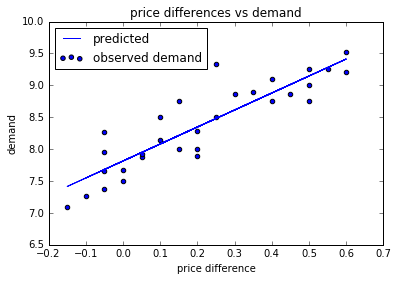

In [108]:
plt.hold = True
pylab.xlabel('price difference')
pylab.ylabel('demand')

plt.plot(x,predictions)
plt.scatter(x, y)
plt.title("price differences vs demand")
plt.legend(['predicted','observed demand'], loc=0)
# plt.show()